# OOD Histogram Notebook

This notebook generates the histograms used for displaying the results of OOD detection using likelihoods. We do this for both two-step models and likelihood-based single-step models.

In each cell (after the first setup cell), you will first need to specify the path to a run via `run_dir`. Note that this directory must have already had the OOD Evaluator run on it, which is accessible by adding the `--test-ood` flag to a `main` or `single_main` run (see `README`). Then, specify an appropriate `title`, load the run from the directory, and call `plot_ood_histogram_from_run_dir`. You will need to update the following to improve the quality of the histogram:

1. `range` specifies the range of likelihood values to show on the histogram. Without an appropriate range, the figure is meaningless.
2. `decision_height` specifies the height of the dashed decision boundary that specifies predicted in-sample from predicted out-of-sample.

The last step here is saving which is easily accomplished through `matplotlib`.

Note that two-step models allow for the possibility of OOD detection in either ambient space (`low_dim=False`) or latent space (`low_dim=True`).

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

# NOTE: Janky path addition required because we are now running from the `notebooks` directory
#       rather than the main `two_step_zoo` directory
import os
import sys

cwd = os.getcwd()
sys.path.insert(0, cwd.strip(os.path.basename(cwd))[:-1])
from load_run import load_run
from two_step_zoo.evaluators.ood_helpers import plot_ood_histogram_from_run_dir
sys.path.pop(0)

Did not find best_valid gae checkpoint
Did not find latest gae checkpoint
Did not find best_valid de checkpoint
Did not find latest de checkpoint
Classification rate: 98.07%


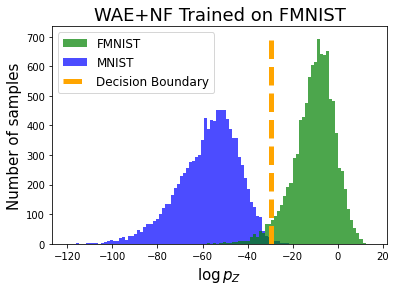

Loaded nf checkpoint `best_valid' after epoch 96
Classification rate: 36.09%


In [2]:
# Start by loading a two-step module. This run needs to have had the OOD Evaluator run on it already.
run_dir = "../runs/fashion-mnist/de-runs/Jan24_14-48-04"
title = "WAE+NF Trained on FMNIST"

# NOTE: Currently a (small) bug where the data redownloads into this directory rather than
#       pulling data which already exists. Delete this extra data folder as required.
load_dict = load_run(run_dir)

plot_ood_histogram_from_run_dir(
    run_dir=run_dir,
    low_dim=True,
    range=[-120,15],
    title=title,
    decision_height=700,
    bins=100
)

plt.savefig(f"{title}.png")

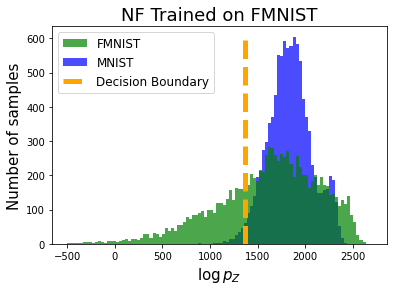

In [4]:
# Next, load a single step module. This run needs to have had the OOD Evaluator run on it already.
run_dir = "../runs/fashion-mnist/flows/Jan25_16-16-15"
title = "NF Trained on FMNIST"

load_dict = load_run(run_dir)

plot_ood_histogram_from_run_dir(
    run_dir=run_dir,
    low_dim=False,
    range=[-500, 2700],
    title=title,
    decision_height=600,
    bins=100
)

plt.savefig(f"{title}.png")